In [1]:
import numpy.polynomial.polynomial as poly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:/Excel/Crude-Oil_160101-221213.csv")
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1744,2022-12-06,77.35,77.88,73.41,74.25,74.25,380598
1745,2022-12-07,74.55,75.38,71.75,72.01,72.01,392236
1746,2022-12-08,72.38,75.44,71.12,71.46,71.46,474459
1747,2022-12-09,71.85,72.92,70.08,71.02,71.02,356722
1748,2022-12-12,71.79,73.99,70.25,73.17,73.17,356722


In [3]:
df['Time'] = np.arange(len(df.index))
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Time
1744,2022-12-06,77.35,77.88,73.41,74.25,74.25,380598,1744
1745,2022-12-07,74.55,75.38,71.75,72.01,72.01,392236,1745
1746,2022-12-08,72.38,75.44,71.12,71.46,71.46,474459,1746
1747,2022-12-09,71.85,72.92,70.08,71.02,71.02,356722,1747
1748,2022-12-12,71.79,73.99,70.25,73.17,73.17,356722,1748


In [4]:
df['Date_New'] = pd.to_datetime(df.Date)
type(df['Date_New'])

pandas.core.series.Series

In [5]:
df.index = df['Date_New']
df

,Date,Open,High,Low,Close,Adj Close,Volume,Time,Date_New
Date_New,,,,,,,,,
2016-01-04,2016-01-04,37.60,38.39,36.33,36.76,36.76,431985,0,2016-01-04
2016-01-05,2016-01-05,36.90,37.10,35.74,35.97,35.97,410131,1,2016-01-05
2016-01-06,2016-01-06,36.18,36.39,33.77,33.97,33.97,563811,2,2016-01-06
2016-01-07,2016-01-07,34.09,34.26,32.10,33.27,33.27,617409,3,2016-01-07
2016-01-08,2016-01-08,33.30,34.34,32.64,33.16,33.16,596496,4,2016-01-08
...,...,...,...,...,...,...,...,...,...
2022-12-06,2022-12-06,77.35,77.88,73.41,74.25,74.25,380598,1744,2022-12-06
2022-12-07,2022-12-07,74.55,75.38,71.75,72.01,72.01,392236,1745,2022-12-07
2022-12-08,2022-12-08,72.38,75.44,71.12,71.46,71.46,474459,1746,2022-12-08


In [6]:
len(df)

1749

<AxesSubplot:xlabel='Date'>

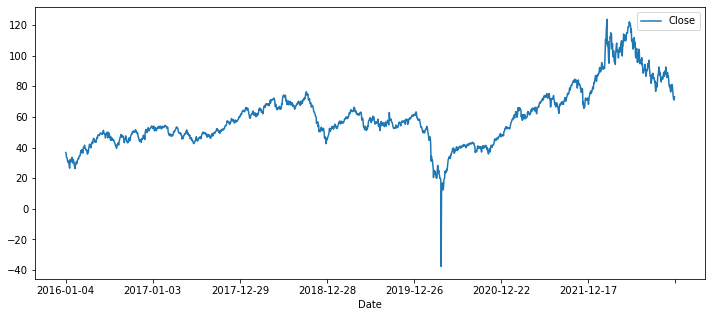

In [7]:
df.plot(x = 'Date', y = 'Close', figsize = (12,5))

In [8]:
x = np.array(df.Time, dtype = float)
y = np.array(df.Close, dtype = float)
z = [1749,1750,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778]

In [9]:
no_of_predictions = 30
datelist_future = pd.date_range(start = "12/13/2022",end = "01/11/2023")

In [11]:
coefs = poly.polyfit(x, y, 9)
x_new = np.linspace(x[0], x[-1] + no_of_predictions, num = len(x) + no_of_predictions)
ffit = poly.polyval(x_new, coefs)
fit = poly.polyval(y, coefs)
pred = poly.polyval(z, coefs)
predictions = pd.DataFrame(datelist_future,pred)
print(predictions)

                   0
69.282449 2022-12-13
68.642890 2022-12-14
67.994526 2022-12-15
67.337275 2022-12-16
66.671054 2022-12-17
65.995779 2022-12-18
65.311366 2022-12-19
64.617730 2022-12-20
63.914784 2022-12-21
63.202443 2022-12-22
62.480618 2022-12-23
61.749223 2022-12-24
61.008167 2022-12-25
60.257362 2022-12-26
59.496716 2022-12-27
58.726140 2022-12-28
57.945541 2022-12-29
57.154826 2022-12-30
56.353903 2022-12-31
55.542677 2023-01-01
54.721052 2023-01-02
53.888934 2023-01-03
53.046226 2023-01-04
52.192829 2023-01-05
51.328648 2023-01-06
50.453581 2023-01-07
49.567530 2023-01-08
48.670393 2023-01-09
47.762070 2023-01-10
46.842458 2023-01-11


In [74]:
new_date = df.index.append(datelist_future)
new_date

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09',
               '2023-01-10', '2023-01-11'],
              dtype='datetime64[ns]', length=1779, freq=None)

In [84]:
len(fit)

1749

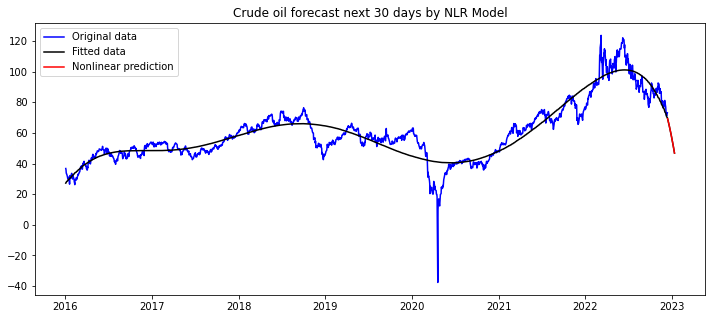

In [75]:
plt.figure(figsize = (12,5))
plt.title('Crude oil forecast next 30 days by NLR Model')
plt.plot(df['Date_New'], y, 'blue', label = "Original data")
plt.plot(new_date, ffit, 'black', label = "Fitted data")
plt.plot(datelist_future, pred, 'red', label = "Nonlinear prediction")
plt.legend(loc = 'upper left')
plt.show()

In [89]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

mse = mean_squared_error(df['Close'], fit)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(df['Close'], fit)
print("RMSE: ", rmse)
print("MAPE: ", mape * 100)

RMSE:  25.83882069602749
MAPE:  31.509764081624
